#Tensorflow Regression (quality prediction)


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Print the total time taken to execute the code
import time
start_time = time.time()

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv',sep=';' )
dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Ejemplo 1 (se debe normalizar):
Supongamos que tenemos un conjunto de datos que representa la altura de personas en centímetros y su respectivo peso en kilogramos. Los valores mínimos y máximos son los siguientes:

Altura: min=150cm, max=190cm
Peso: min=50kg, max=120kg
Podemos observar que la diferencia entre el mínimo y el máximo de altura es mucho mayor que la diferencia entre el mínimo y el máximo de peso. Por lo tanto, si queremos aplicar un algoritmo de aprendizaje automático que tenga en cuenta ambas características de manera igual, es necesario normalizar los datos para que ambas características estén en la misma escala.

Ejemplo 2 (no se debe normalizar):
Supongamos que tenemos un conjunto de datos que representa la temperatura ambiente en grados Celsius y la temperatura del agua en grados Celsius en diferentes momentos del día. Los valores mínimos y máximos son los siguientes:

Temperatura ambiente: min=15°C, max=35°C
Temperatura del agua: min=18°C, max=22°C
En este caso, las diferencias entre los mínimos y máximos son similares en ambas características, por lo que no es necesario normalizar los datos. Además, en este caso, normalizar los datos podría incluso eliminar información importante, ya que la diferencia entre la temperatura ambiente y la del agua es una característica importante que debe mantenerse en la escala original.

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

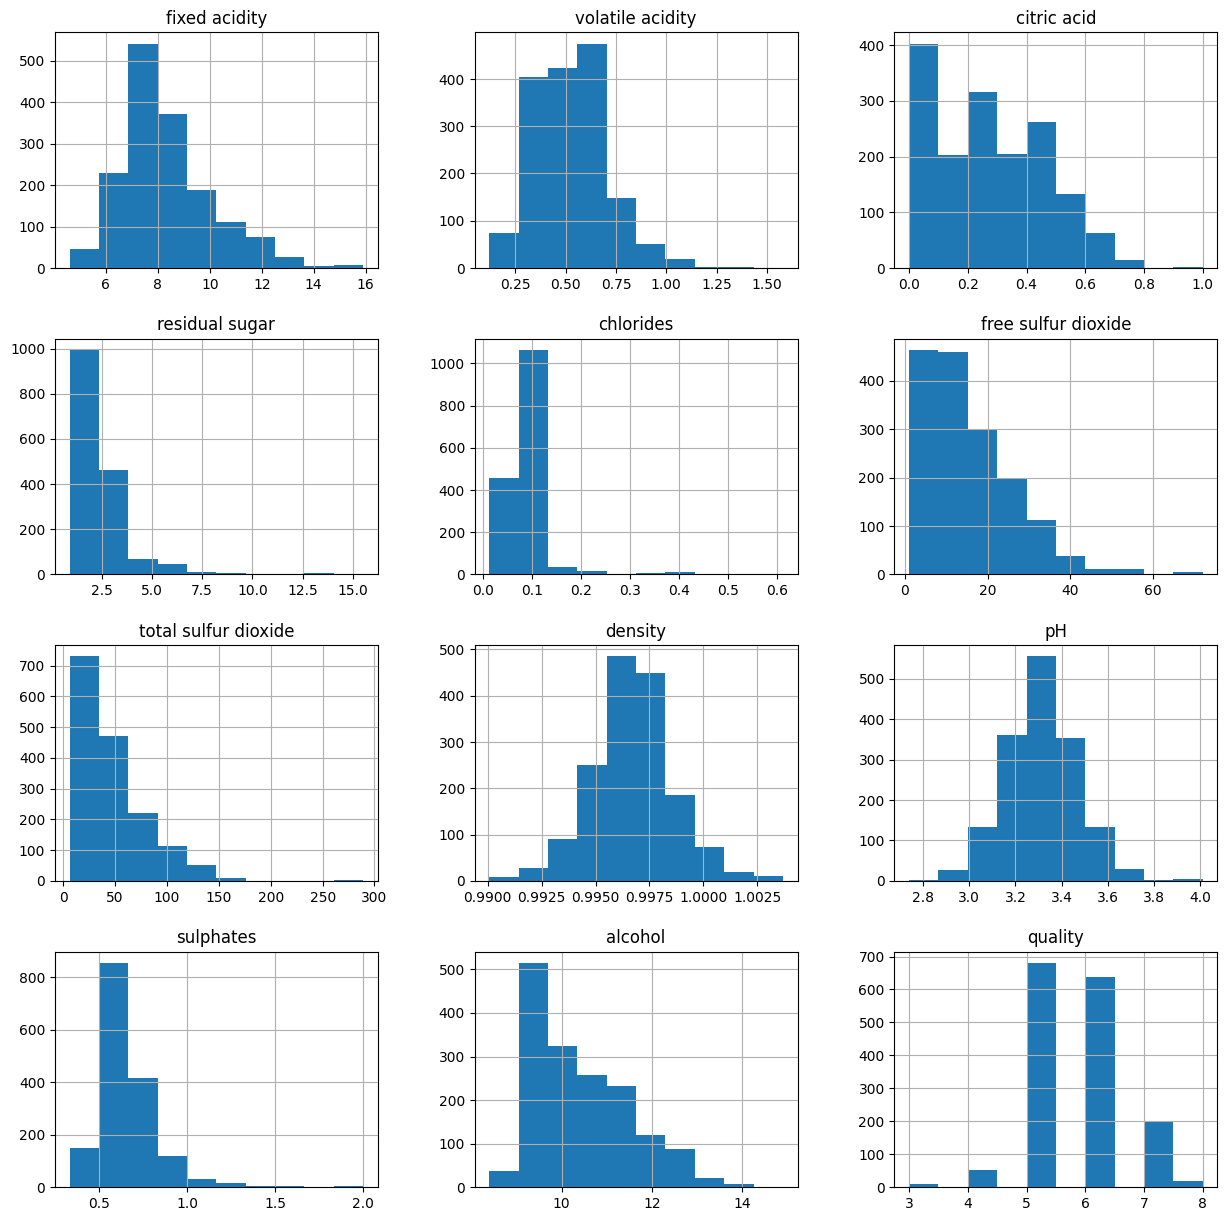

In [3]:
dataset.hist(figsize=(15,15))

Se debe normalizar por la diferentes escalas que hay en el data set

In [4]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [5]:

max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [6]:
# Split the data into features and labels
X = data.drop('quality', axis=1)
y = data['quality']

In [7]:
X.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385


In [8]:
y.head(4)

0    0.4
1    0.4
2    0.4
3    0.6
Name: quality, dtype: float64

Seed

In [9]:
tf.random.set_seed(42)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

input_shape=(X_train.shape[1])
print(input_shape)

11


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model_Nadam():
  model = Sequential()
  model.add(Dense(16, input_dim = input_shape, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
 
  model.compile(loss = 'mse', optimizer = opt )

  return model





In [12]:
model= model_Nadam()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test) ,verbose=0)

Final loss:  0.01670517958700657


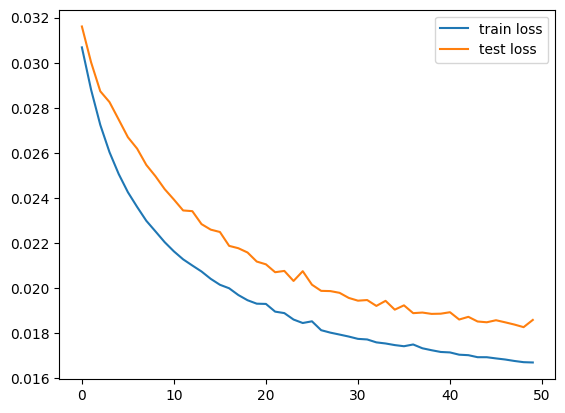

In [14]:
final_loss = history.history['loss'][-1]
print("Final loss: ", final_loss)

# Plot the loss and accuracy graphs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()



In [15]:
X_test.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
348,0.442478,0.301370,0.31,0.130137,0.128548,0.197183,0.141343,0.574890,0.291339,0.353293,0.246154
675,0.415929,0.198630,0.39,0.089041,0.086811,0.154930,0.088339,0.611601,0.409449,0.191617,0.276923
1453,0.265487,0.253425,0.33,0.068493,0.103506,0.366197,0.279152,0.513216,0.527559,0.149701,0.092308
785,0.469027,0.157534,0.41,0.095890,0.118531,0.140845,0.194346,0.596916,0.370079,0.101796,0.169231


In [16]:
y_test.head(4)

348     0.6
675     0.4
1453    0.4
785     0.4
Name: quality, dtype: float64

In [17]:
# Predict house prices for test set
y_pred = model.predict(X_test)
print(y_pred[:4])


15/15 [==============================] - 0s 5ms/step
[[0.5441787 ]
 [0.54130346]
 [0.39552432]
 [0.46012807]]


Evaluation of the model

In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE :', rmse)

RMSE : 0.1363546747325788


In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)


MAE: 0.10678983293473726


In [20]:


# do all the code here

print("Total time taken:", time.time() - start_time, "seconds.")

Total time taken: 21.47658896446228 seconds.
